# COURSE: A deep understanding of deep learning
## SECTION: Overfitting, cross-validation, regularization
### LECTURE: Cross-validation on regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202208

In [29]:
# import libraries
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Create the data and the model

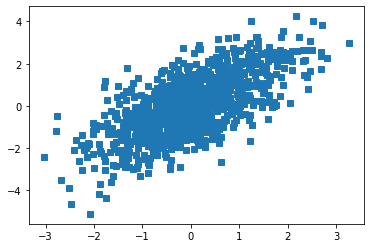

In [79]:
N = 1000
x = torch.randn(N,1)
y = x + torch.randn(N,1)

# and plot
plt.plot(x,y,'s')
plt.show()

# Select data for training

In [67]:
from torch.functional import Tensor
train_data,test_data, train_labels,test_labels = \
                              train_test_split(x, y, train_size=.8,random_state=42)

train_data = TensorDataset(train_data,train_labels)
test_data = TensorDataset(test_data,test_labels)

train_loader = DataLoader(train_data,shuffle=True,batch_size=12)
test_loader = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [66]:
# help(train_test_split)

In [68]:
# # select training data (note the hard-coded N!)
# trainidx  = np.random.choice(range(N),int(N*0.8),replace=False) # random indices
# trainBool = np.zeros(N,dtype=bool) # initialize vector of Falses'
# trainBool[trainidx] = True # set selected samples to True

# # show the sizes
# print(x[trainBool].shape)
# print(x[~trainBool].shape)

# Train the model

In [65]:
# build model
def createANewModel():
    ANNreg = nn.Sequential(
        nn.Linear(1,1),  # input layer
        nn.ReLU(),       # activation function
        nn.Linear(1,1)   # output layer
        )
    # model meta-parameters
    learningRate = .05

    # loss function
    lossfun = nn.MSELoss()

    # optimizer
    optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)
    return ANNreg, lossfun, optimizer

In [57]:
def trainTheModel(numepochs = 500):
    test_losses = []

    for epochi in range(numepochs):
        
        for X,y in train_loader:
            # forward pass
            yHat = ANNreg(X)

            # compute loss
            loss = lossfun(yHat,y)

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


        # test accuracy
        X,y = next(iter(test_loader)) # extract X,y from test dataloader
        predYtest = ANNreg(X)
        testloss = (predYtest-y).pow(2).mean()
        test_losses.append(testloss.detach())

    return ANNreg, test_losses

In [70]:
# create a model
ANNreg,lossfun,optimizer = createANewModel()

# train the model
test_losses = trainTheModel()

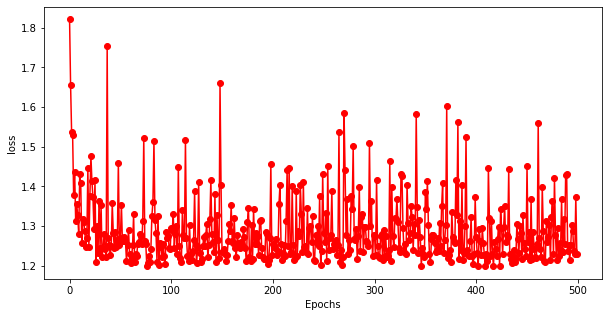

In [59]:
fig = plt.figure(figsize=(10,5))

plt.plot(test_losses,'ro-')
# plt.plot(testAcc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('loss')

# optional zoom-in to final epochs
# plt.xlim([300,500])
# plt.ylim([90,100.5])

plt.show()

In [24]:
# # report the losses

# # compute losses of the TEST set
# predYtest = ANNreg(x[~trainBool])
# testloss = (predYtest-y[~trainBool]).pow(2).mean()

# # print out final TRAIN loss and TEST loss
# print(f'Final TRAIN loss: {loss.detach():.2f}')
# print(f'Final TEST loss: {testloss.detach():.2f}')

Final TRAIN loss: 1.05
Final TEST loss: 0.99


In [82]:
X_test,y_test = next(iter(test_loader)) # extract X,y from test dataloader
predYtest = ANNreg(X_test).detach().numpy()

In [76]:
# predYtest}

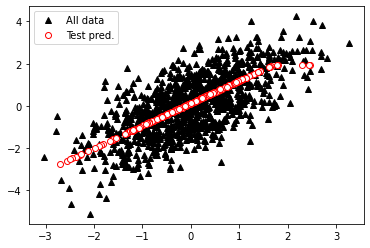

In [83]:

### plot the data

# predictions for final training run
# predYtrain = ANNreg().detach().numpy()

# now plot
plt.plot(x,y,'k^',label='All data')
# plt.plot(, predYtrain,
#          'bs',markerfacecolor='w',label='Training pred.')
plt.plot(X_test,predYtest,
         'ro',markerfacecolor='w',label='Test pred.')
plt.legend()
plt.show()

# Additional explorations

In [26]:
# 1) The train/test split is currently hard-coded to be 80/20 (note the number "80"). This is bad coding style, because
#    if you change the number of datapoints from N=100 to N=10000, then we're still only training on 80 samples and testing
#    on 10000-80=9920 samples. Change how the variable trainBool is created so that it always trains on 80% of the data,
#    regardless of the dataset size.
# 
# 2) Re-write this code to use scikitlearn and/or DataLoader instead of manually separating the data into train/test.
# 
# 3) Do we really need 500 epochs to train the model? To find out, add code to the training loop to compute the MSEloss 
#    for the train and test data on each iteration during training. Then plot the train and test error as a function of
#    training epoch. What is your evaluation of an appropriate amount of training for this model/dataset?
# 